# This is Shravanti's and my final project of the Data-Science Bootcamp at WBS Coding School

#### The main goal of our work is to use data of gas consumption and gas prices from the past 4 years (2018 - 2021) to predict consumption and prices for 2022, as if the Ukraine war would have not happened.
#### We will compare this predicted data to the actual data (01 - 07/2022) to show the effect of the war on the consumption and the prices.
#### As the last step, we will predict gas consumption and prices based on the current data (01 - 07/2022) with diffent scenarios of the gas supply by Russia.

### **This notebook contains the data cleaning of the "gas supply" datasets.**

In [50]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

#### Supply for 2018 - 2020

In [51]:
data_original_supply_2020 = pd.read_excel(r"/Volumes/Extreme Pro/WBS Bootcamp Data Science/Final Project/Data/Original/Gas supply Europe/Gas supply_2018-2020_daily.xlsx")
data_original_supply_2020.head(10)

,Date,"Delivery from Russia to European Union, million cubic meters","Delivery from Belarus to European Union, million cubic meters","Delivery from Russia and Belarus to European Union, million cubic meters"
0,2020-12-31,196.7,111.4,308.1
1,2020-12-30,194.0,112.2,306.2
2,2020-12-29,195.0,111.2,306.2
3,2020-12-28,193.9,110.3,304.2
4,2020-12-27,196.0,110.4,306.4
5,2020-12-26,196.5,110.4,306.9
6,2020-12-25,198.1,110.2,308.3
7,2020-12-24,198.1,109.4,307.5
8,2020-12-23,198.1,109.5,307.6
9,2020-12-22,198.3,109.8,308.1


In [52]:
data_original_supply_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 4 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   Date                                                                      1096 non-null   datetime64[ns]
 1   Delivery from Russia to European Union, million cubic meters              1096 non-null   float64       
 2   Delivery from Belarus to European Union, million cubic meters             1096 non-null   float64       
 3   Delivery from Russia and Belarus to European Union, million cubic meters  1096 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 34.4 KB


In [53]:
data_supply_20xx = data_original_supply_2020.assign(
                            day = data_original_supply_2020["Date"].dt.strftime("%d"), 
                            month = data_original_supply_2020["Date"].dt.strftime("%B"),
                            month_no = data_original_supply_2020["Date"].dt.strftime("%m"),
                            year = data_original_supply_2020["Date"].dt.strftime("%Y"))

data_supply_20xx

,Date,"Delivery from Russia to European Union, million cubic meters","Delivery from Belarus to European Union, million cubic meters","Delivery from Russia and Belarus to European Union, million cubic meters",day,month,month_no,year
0,2020-12-31,196.7,111.4,308.1,31,December,12,2020
1,2020-12-30,194.0,112.2,306.2,30,December,12,2020
2,2020-12-29,195.0,111.2,306.2,29,December,12,2020
3,2020-12-28,193.9,110.3,304.2,28,December,12,2020
4,2020-12-27,196.0,110.4,306.4,27,December,12,2020
...,...,...,...,...,...,...,...,...
1091,2018-01-05,176.2,116.2,292.4,05,January,01,2018
1092,2018-01-04,175.5,116.4,291.9,04,January,01,2018
1093,2018-01-03,175.1,116.7,291.8,03,January,01,2018
1094,2018-01-02,176.3,116.6,292.9,02,January,01,2018


In [54]:
# drop unwanted columns "Date" and "Delivery from Russia to Belarussia, Ukraine"
data_supply_20xx = data_supply_20xx.drop(data_supply_20xx.columns[[0, 2, 3]],axis = 1)
data_supply_20xx

,"Delivery from Russia to European Union, million cubic meters",day,month,month_no,year
0,196.7,31,December,12,2020
1,194.0,30,December,12,2020
2,195.0,29,December,12,2020
3,193.9,28,December,12,2020
4,196.0,27,December,12,2020
...,...,...,...,...,...
1091,176.2,05,January,01,2018
1092,175.5,04,January,01,2018
1093,175.1,03,January,01,2018
1094,176.3,02,January,01,2018


In [55]:
# change order of columns
data_supply_20xx = data_supply_20xx[["day", "month", "month_no", "year", 
                                    "Delivery from Russia to European Union, million cubic meters"]]
data_supply_20xx

,day,month,month_no,year,"Delivery from Russia to European Union, million cubic meters"
0,31,December,12,2020,196.7
1,30,December,12,2020,194.0
2,29,December,12,2020,195.0
3,28,December,12,2020,193.9
4,27,December,12,2020,196.0
...,...,...,...,...,...
1091,05,January,01,2018,176.2
1092,04,January,01,2018,175.5
1093,03,January,01,2018,175.1
1094,02,January,01,2018,176.3


In [56]:
data_supply_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   day                                                           1096 non-null   object 
 1   month                                                         1096 non-null   object 
 2   month_no                                                      1096 non-null   object 
 3   year                                                          1096 non-null   object 
 4   Delivery from Russia to European Union, million cubic meters  1096 non-null   float64
dtypes: float64(1), object(4)
memory usage: 42.9+ KB


In [57]:
# change datatype of day and year to numeric
data_supply_20xx[["day", "month_no", "year"]] = data_supply_20xx[["day", "month_no", "year"]].apply(pd.to_numeric)
data_supply_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   day                                                           1096 non-null   int64  
 1   month                                                         1096 non-null   object 
 2   month_no                                                      1096 non-null   int64  
 3   year                                                          1096 non-null   int64  
 4   Delivery from Russia to European Union, million cubic meters  1096 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 42.9+ KB


In [58]:
data_supply_20xx.rename(columns={data_supply_20xx.columns[4]: "Gas supply by Russia"}, inplace=True)
data_supply_20xx

,day,month,month_no,year,Gas supply by Russia
0,31,December,12,2020,196.7
1,30,December,12,2020,194.0
2,29,December,12,2020,195.0
3,28,December,12,2020,193.9
4,27,December,12,2020,196.0
...,...,...,...,...,...
1091,5,January,1,2018,176.2
1092,4,January,1,2018,175.5
1093,3,January,1,2018,175.1
1094,2,January,1,2018,176.3


In [59]:
# sort rows
data_supply_20xx = data_supply_20xx.sort_values(["month_no", "year", "day"]).reset_index(drop=True)
data_supply_20xx

,day,month,month_no,year,Gas supply by Russia
0,1,January,1,2018,177.5
1,2,January,1,2018,176.3
2,3,January,1,2018,175.1
3,4,January,1,2018,175.5
4,5,January,1,2018,176.2
...,...,...,...,...,...
1091,27,December,12,2020,196.0
1092,28,December,12,2020,193.9
1093,29,December,12,2020,195.0
1094,30,December,12,2020,194.0


#### Supply for 2021

In [60]:
data_original_supply_2021 = pd.read_excel(r"/Volumes/Extreme Pro/WBS Bootcamp Data Science/Final Project/Data/Original/Gas supply Europe/Gas supply_01-122021_daily.xlsx")
data_original_supply_2021.head(10)

,Date (Jan-Dec 2021),"Delivery from Russia to Belurussia and Ukraine, million cubic meters","Delivery from Russia to European Union, million cubic meters","Delivery from Belurussia to European Union, million cubic meters"
0,31 December 2021,102.6,213.9,18.8
1,30 December 2021,104.0,219.6,26.7
2,29 December 2021,100.0,225.3,26.5
3,28 December 2021,92.3,223.9,27.6
4,27 December 2021,89.3,225.3,26.7
5,26 December 2021,90.8,222.0,27.6
6,25 December 2021,88.6,225.3,28.8
7,24 December 2021,88.6,222.5,30.4
8,23 December 2021,93.6,217.2,31.5
9,22 December 2021,104.3,229.9,28.2


In [61]:
data_original_supply_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Date (Jan-Dec  2021)                                                  365 non-null    object 
 1   Delivery from Russia to Belurussia and Ukraine, million cubic meters  365 non-null    float64
 2   Delivery from Russia to European Union, million cubic meters          365 non-null    float64
 3   Delivery from Belurussia to European Union, million cubic meters      365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


In [62]:
# convert column "Date (Jan-Dec  2021)" into Datetime-datatype
data_original_supply_2021["Date (Jan-Dec  2021)"] = pd.to_datetime(data_original_supply_2021["Date (Jan-Dec  2021)"])
data_original_supply_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   Date (Jan-Dec  2021)                                                  365 non-null    datetime64[ns]
 1   Delivery from Russia to Belurussia and Ukraine, million cubic meters  365 non-null    float64       
 2   Delivery from Russia to European Union, million cubic meters          365 non-null    float64       
 3   Delivery from Belurussia to European Union, million cubic meters      365 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [63]:
data_supply_2021 = data_original_supply_2021.assign(
                            day = data_original_supply_2021["Date (Jan-Dec  2021)"].dt.strftime("%d"), 
                            month = data_original_supply_2021["Date (Jan-Dec  2021)"].dt.strftime("%B"),
                            month_no = data_original_supply_2021["Date (Jan-Dec  2021)"].dt.strftime("%m"),
                            year = data_original_supply_2021["Date (Jan-Dec  2021)"].dt.strftime("%Y"))

data_supply_2021

,Date (Jan-Dec 2021),"Delivery from Russia to Belurussia and Ukraine, million cubic meters","Delivery from Russia to European Union, million cubic meters","Delivery from Belurussia to European Union, million cubic meters",day,month,month_no,year
0,2021-12-31,102.6,213.9,18.8,31,December,12,2021
1,2021-12-30,104.0,219.6,26.7,30,December,12,2021
2,2021-12-29,100.0,225.3,26.5,29,December,12,2021
3,2021-12-28,92.3,223.9,27.6,28,December,12,2021
4,2021-12-27,89.3,225.3,26.7,27,December,12,2021
...,...,...,...,...,...,...,...,...
360,2021-01-05,125.8,198.2,110.2,05,January,01,2021
361,2021-01-04,124.2,195.8,110.0,04,January,01,2021
362,2021-01-03,124.0,199.0,109.1,03,January,01,2021
363,2021-01-02,124.1,196.7,108.0,02,January,01,2021


In [64]:
# drop unwanted columns "Date" and "Delivery from Russia to Belarussia, Ukraine"
data_supply_2021 = data_supply_2021.drop(data_supply_2021.columns[[0, 1, 3]],axis = 1)
data_supply_2021

,"Delivery from Russia to European Union, million cubic meters",day,month,month_no,year
0,213.9,31,December,12,2021
1,219.6,30,December,12,2021
2,225.3,29,December,12,2021
3,223.9,28,December,12,2021
4,225.3,27,December,12,2021
...,...,...,...,...,...
360,198.2,05,January,01,2021
361,195.8,04,January,01,2021
362,199.0,03,January,01,2021
363,196.7,02,January,01,2021


In [65]:
# change order of columns
data_supply_2021 = data_supply_2021[["day", "month", "month_no", "year", 
                                    "Delivery from Russia to European Union, million cubic meters"]]
data_supply_2021

,day,month,month_no,year,"Delivery from Russia to European Union, million cubic meters"
0,31,December,12,2021,213.9
1,30,December,12,2021,219.6
2,29,December,12,2021,225.3
3,28,December,12,2021,223.9
4,27,December,12,2021,225.3
...,...,...,...,...,...
360,05,January,01,2021,198.2
361,04,January,01,2021,195.8
362,03,January,01,2021,199.0
363,02,January,01,2021,196.7


In [66]:
data_supply_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   day                                                           365 non-null    object 
 1   month                                                         365 non-null    object 
 2   month_no                                                      365 non-null    object 
 3   year                                                          365 non-null    object 
 4   Delivery from Russia to European Union, million cubic meters  365 non-null    float64
dtypes: float64(1), object(4)
memory usage: 14.4+ KB


In [67]:
# change datatype of day and year to numeric
data_supply_2021[["day", "month_no", "year"]] = data_supply_2021[["day", "month_no", "year"]].apply(pd.to_numeric)
data_supply_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   day                                                           365 non-null    int64  
 1   month                                                         365 non-null    object 
 2   month_no                                                      365 non-null    int64  
 3   year                                                          365 non-null    int64  
 4   Delivery from Russia to European Union, million cubic meters  365 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 14.4+ KB


In [68]:
data_supply_2021.rename(columns={data_supply_2021.columns[4]: "Gas supply by Russia"}, inplace=True)
data_supply_2021

,day,month,month_no,year,Gas supply by Russia
0,31,December,12,2021,213.9
1,30,December,12,2021,219.6
2,29,December,12,2021,225.3
3,28,December,12,2021,223.9
4,27,December,12,2021,225.3
...,...,...,...,...,...
360,5,January,1,2021,198.2
361,4,January,1,2021,195.8
362,3,January,1,2021,199.0
363,2,January,1,2021,196.7


In [69]:
# sort rows
data_supply_2021 = data_supply_2021.sort_values(["month_no", "year", "day"]).reset_index(drop=True)
data_supply_2021

,day,month,month_no,year,Gas supply by Russia
0,1,January,1,2021,194.8
1,2,January,1,2021,196.7
2,3,January,1,2021,199.0
3,4,January,1,2021,195.8
4,5,January,1,2021,198.2
...,...,...,...,...,...
360,27,December,12,2021,225.3
361,28,December,12,2021,223.9
362,29,December,12,2021,225.3
363,30,December,12,2021,219.6


#### Merging data for different time periods together into one dataframe

In [70]:
data_supply = pd.concat([data_supply_20xx, data_supply_2021]).reset_index(drop=True)
data_supply

,day,month,month_no,year,Gas supply by Russia
0,1,January,1,2018,177.5
1,2,January,1,2018,176.3
2,3,January,1,2018,175.1
3,4,January,1,2018,175.5
4,5,January,1,2018,176.2
...,...,...,...,...,...
1456,27,December,12,2021,225.3
1457,28,December,12,2021,223.9
1458,29,December,12,2021,225.3
1459,30,December,12,2021,219.6


In [71]:
# creating csv-file with final cleaned dataframe
data_supply.to_csv("Final Data_Gas supply_2018-2021_daily.csv")

#### Supply for 2022

In [72]:
data_original_supply_2022 = pd.read_excel(r"/Volumes/Extreme Pro/WBS Bootcamp Data Science/Final Project/Data/Original/Gas supply Europe/Gas supply_01-042022_daily.xlsx")
data_original_supply_2022.head(10)

,Date (Jan - April 2022),"Delivery from Russia to Belurussia and Ukraine, million cubic meters","Delivery from Russia to European Union, million cubic meters","Delivery from Belurussia to European Union, million cubic meters"
0,26 April 2022,56.0,196.5,18.6
1,25 April 2022,67.4,196.7,11.5
2,24 April 2022,54.5,195.4,12.3
3,23 April 2022,47.8,195.5,13.3
4,22 April 2022,58.7,196.8,18.6
5,21 April 2022,57.5,200.4,18.8
6,20 April 2022,55.6,200.6,19.3
7,19 April 2022,55.1,199.6,19.2
8,18 April 2022,56.9,198.7,19.2
9,17 April 2022,56.9,196.7,18.8


In [73]:
data_original_supply_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Date (Jan - April 2022)                                               116 non-null    object 
 1   Delivery from Russia to Belurussia and Ukraine, million cubic meters  116 non-null    float64
 2   Delivery from Russia to European Union, million cubic meters          116 non-null    float64
 3   Delivery from Belurussia to European Union, million cubic meters      116 non-null    float64
dtypes: float64(3), object(1)
memory usage: 3.8+ KB


In [74]:
# convert column "Date (Jan-Aprl 2022)" into Datetime-datatype
data_original_supply_2022["Date (Jan - April 2022)"] = pd.to_datetime(data_original_supply_2022["Date (Jan - April 2022)"])
data_original_supply_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   Date (Jan - April 2022)                                               116 non-null    datetime64[ns]
 1   Delivery from Russia to Belurussia and Ukraine, million cubic meters  116 non-null    float64       
 2   Delivery from Russia to European Union, million cubic meters          116 non-null    float64       
 3   Delivery from Belurussia to European Union, million cubic meters      116 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.8 KB


In [75]:
data_supply_2022 = data_original_supply_2022.assign(
                            day = data_original_supply_2022["Date (Jan - April 2022)"].dt.strftime("%d"), 
                            month = data_original_supply_2022["Date (Jan - April 2022)"].dt.strftime("%B"),
                            month_no = data_original_supply_2022["Date (Jan - April 2022)"].dt.strftime("%m"),
                            year = data_original_supply_2022["Date (Jan - April 2022)"].dt.strftime("%Y"))

data_supply_2022

,Date (Jan - April 2022),"Delivery from Russia to Belurussia and Ukraine, million cubic meters","Delivery from Russia to European Union, million cubic meters","Delivery from Belurussia to European Union, million cubic meters",day,month,month_no,year
0,2022-04-26,56.0,196.5,18.6,26,April,04,2022
1,2022-04-25,67.4,196.7,11.5,25,April,04,2022
2,2022-04-24,54.5,195.4,12.3,24,April,04,2022
3,2022-04-23,47.8,195.5,13.3,23,April,04,2022
4,2022-04-22,58.7,196.8,18.6,22,April,04,2022
...,...,...,...,...,...,...,...,...
111,2022-01-05,53.0,189.1,22.2,05,January,01,2022
112,2022-01-04,50.6,187.3,5.4,04,January,01,2022
113,2022-01-03,51.9,185.9,9.4,03,January,01,2022
114,2022-01-02,60.0,186.1,10.4,02,January,01,2022


In [76]:
# drop unwanted columns "Date" and "Delivery from Russia to Belarussia, Ukraine"
data_supply_2022 = data_supply_2022.drop(data_supply_2022.columns[[0, 1, 3]],axis = 1)
data_supply_2022

,"Delivery from Russia to European Union, million cubic meters",day,month,month_no,year
0,196.5,26,April,04,2022
1,196.7,25,April,04,2022
2,195.4,24,April,04,2022
3,195.5,23,April,04,2022
4,196.8,22,April,04,2022
...,...,...,...,...,...
111,189.1,05,January,01,2022
112,187.3,04,January,01,2022
113,185.9,03,January,01,2022
114,186.1,02,January,01,2022


In [77]:
# change order of columns
data_supply_2022 = data_supply_2022[["day", "month", "month_no", "year", 
                                    "Delivery from Russia to European Union, million cubic meters"]]
data_supply_2022

,day,month,month_no,year,"Delivery from Russia to European Union, million cubic meters"
0,26,April,04,2022,196.5
1,25,April,04,2022,196.7
2,24,April,04,2022,195.4
3,23,April,04,2022,195.5
4,22,April,04,2022,196.8
...,...,...,...,...,...
111,05,January,01,2022,189.1
112,04,January,01,2022,187.3
113,03,January,01,2022,185.9
114,02,January,01,2022,186.1


In [78]:
data_supply_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   day                                                           116 non-null    object 
 1   month                                                         116 non-null    object 
 2   month_no                                                      116 non-null    object 
 3   year                                                          116 non-null    object 
 4   Delivery from Russia to European Union, million cubic meters  116 non-null    float64
dtypes: float64(1), object(4)
memory usage: 4.7+ KB


In [79]:
# change datatype of day and year to numeric
data_supply_2022[["day", "month_no", "year"]] = data_supply_2022[["day", "month_no", "year"]].apply(pd.to_numeric)
data_supply_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   day                                                           116 non-null    int64  
 1   month                                                         116 non-null    object 
 2   month_no                                                      116 non-null    int64  
 3   year                                                          116 non-null    int64  
 4   Delivery from Russia to European Union, million cubic meters  116 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.7+ KB


In [80]:
data_supply_2022.rename(columns={data_supply_2022.columns[4]: "Gas supply by Russia"}, inplace=True)
data_supply_2022

,day,month,month_no,year,Gas supply by Russia
0,26,April,4,2022,196.5
1,25,April,4,2022,196.7
2,24,April,4,2022,195.4
3,23,April,4,2022,195.5
4,22,April,4,2022,196.8
...,...,...,...,...,...
111,5,January,1,2022,189.1
112,4,January,1,2022,187.3
113,3,January,1,2022,185.9
114,2,January,1,2022,186.1


In [81]:
# sort rows
data_supply_2022 = data_supply_2022.sort_values(["month_no", "year", "day"]).reset_index(drop=True)
data_supply_2022

,day,month,month_no,year,Gas supply by Russia
0,1,January,1,2022,184.3
1,2,January,1,2022,186.1
2,3,January,1,2022,185.9
3,4,January,1,2022,187.3
4,5,January,1,2022,189.1
...,...,...,...,...,...
111,22,April,4,2022,196.8
112,23,April,4,2022,195.5
113,24,April,4,2022,195.4
114,25,April,4,2022,196.7


In [82]:
# creating csv-file with final cleaned dataframe
data_supply_2022.to_csv("Final Data_Gas supply_2022_daily.csv")

## Plotting data

In [83]:
df_to_plot = data_supply.sort_values("month", ascending=True)
df_to_plot

,day,month,month_no,year,Gas supply by Russia
301,1,April,4,2019,175.3
1187,2,April,4,2021,206.4
1188,3,April,4,2021,204.4
1189,4,April,4,2021,203.9
1190,5,April,4,2021,206.8
...,...,...,...,...,...
1345,7,September,9,2021,202.8
1344,6,September,9,2021,203.3
1343,5,September,9,2021,207.0
817,28,September,9,2020,197.2


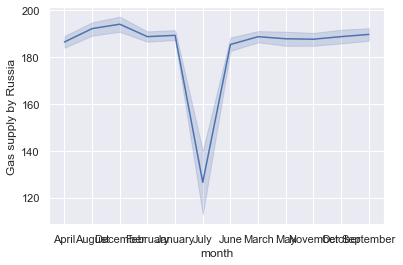

In [84]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=df_to_plot, x="month", y="Gas supply by Russia");